In [22]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem.Draw import MolsToGridImage

In [3]:
df = pd.read_csv("data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
vanilla_mols_df = df.loc[df['vanilla'] == 1]
vanilla_mols_df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26,COc1ccccc1O,medicinal;savory;phenolic;woody;smoky;vanilla;...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32,O=C1CCc2ccccc2O1,herbal;nutty;vanilla;coumarinic;hay;tobacco;sw...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64,COc1cc(C=O)ccc1O,chocolate;vanilla;creamy;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
67,COc1cc(C(C)=O)ccc1O,vanilla;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
vanillin_smiles = ["COc1cc(C=O)ccc1O"]

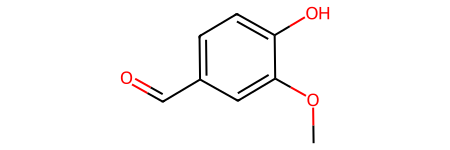

In [8]:
vanilla_mol = Chem.MolFromSmiles(vanillin_smiles[0])
vanilla_mol

In [9]:
def extract_fragments(mol):
    fragments = Chem.GetMolFrags(mol, asMols=True)
    return fragments

In [11]:
fragments = extract_fragments(vanilla_mol)
unique_fragments = set()
for frag in fragments:
    smiles = Chem.MolToSmiles(frag)
    unique_fragments.add(smiles)
unique_fragments


{'COc1cc(C=O)ccc1O'}

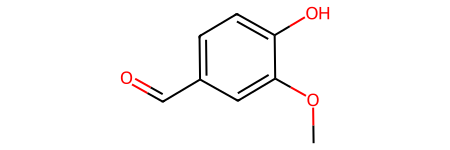

In [13]:
Chem.MolFromSmiles(list(unique_fragments)[0])

In [ ]:
# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trial.task.compute_obj_properties(objs)
log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
index = 0
rewards = []
for i in is_valid:
    if i:
        rewards.append(list(log_rewards)[index])
        index += 1 
    else:
        rewards.append(-1)

MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' if r==-1 else f'reward: {r.exp().item():.2f}' for r in rewards[:25]])

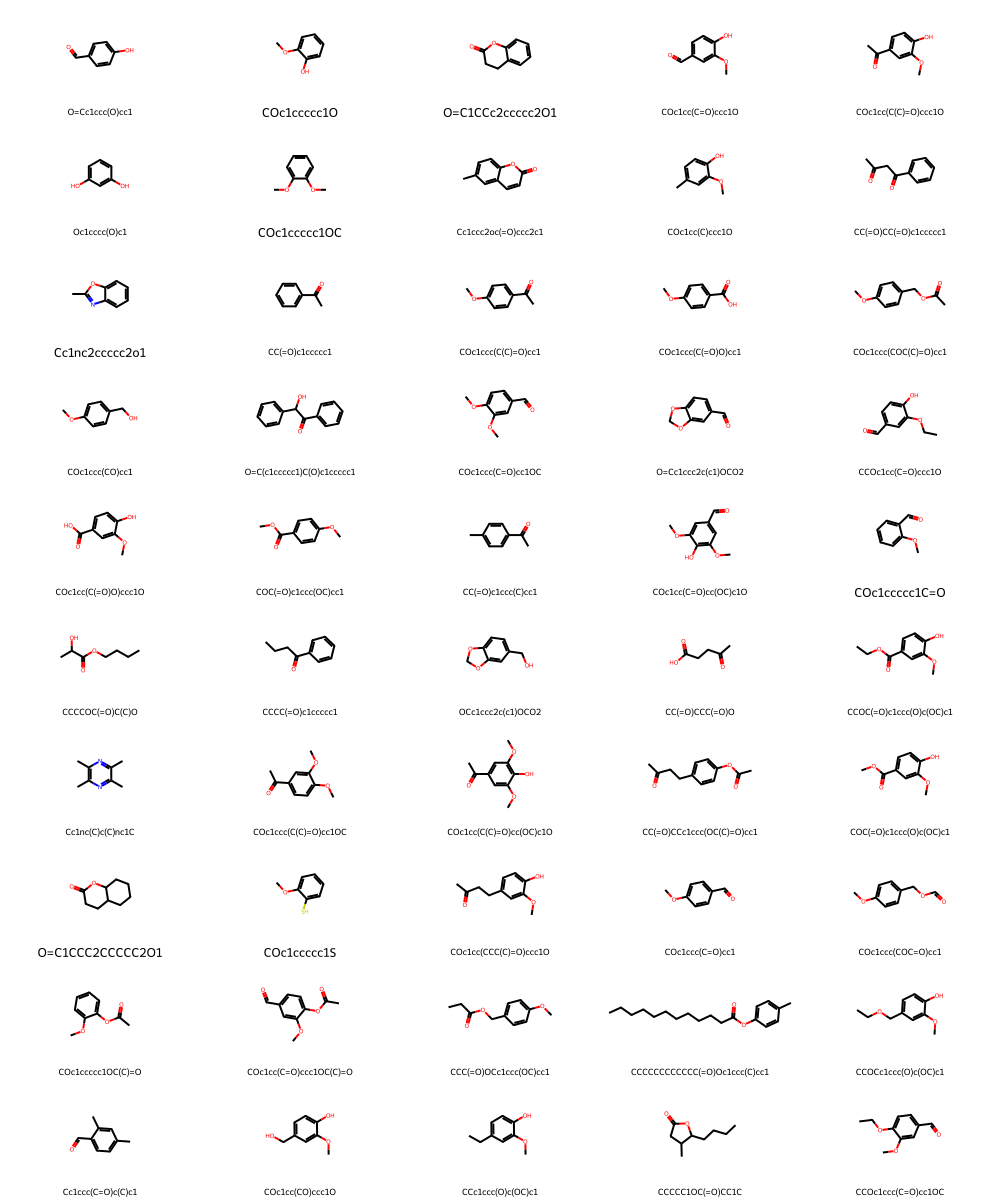

In [34]:
len(vanilla_mols_df)
import numpy as np
11**2
mols = [Chem.MolFromSmiles(smiles) for smiles in vanilla_mols_df["nonStereoSMILES"]] + [Chem.MolFromSmiles("") for smiles in range(10)]
labels = list(vanilla_mols_df["nonStereoSMILES"])+ [" " for smiles in range(10)]
MolsToGridImage(mols[:50], molsPerRow=5, subImgSize=(200, 120), legends=labels[:50])


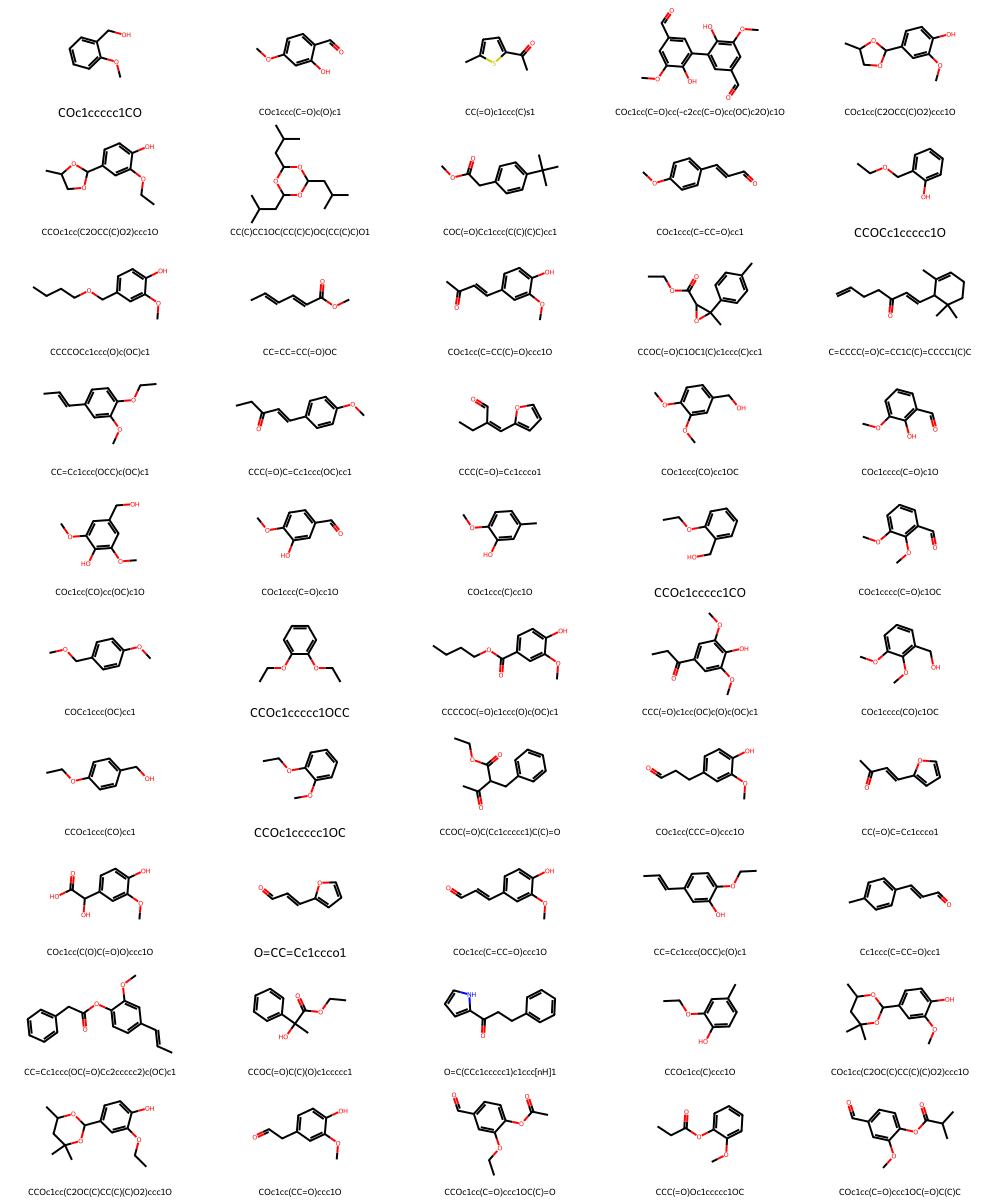

In [33]:
MolsToGridImage(mols[50:100], molsPerRow=5, subImgSize=(200, 120), legends=labels[50:100])

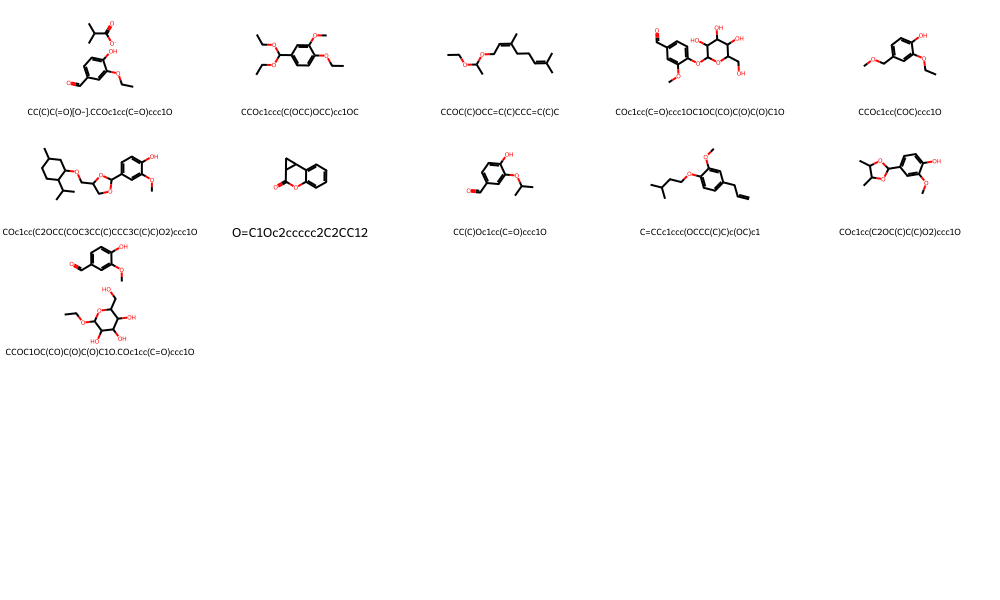

In [32]:
MolsToGridImage(mols[100:], molsPerRow=5, subImgSize=(200, 120), legends=labels[100:])

In [24]:
[1,2,3]+ [4,5,6]

[1, 2, 3, 4, 5, 6]